In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('../workshop3-cleaningData/Salary_Data_Cleaned.csv')

In [9]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Salary(Avg),State,City,Position at HQ,Company Age,JavaScript,Python,C_plus,SQL,AWS
0,0,Software Engineer,$107K-$157K (Glassdoor est.),MedBill is looking for a Software Engineer to ...,4.4,MedBill\n4.4,"Boone, NC","Pittsburgh, PA",51 to 200 employees,2005,...,132.0,NC,Boone,0,15,1,0,0,1,0
1,1,Software Engineer,$107K-$157K (Glassdoor est.),Job Description:\nInfogroup is looking for top...,3.6,Yes Marketing\n3.6,"Marshfield, WI","Chicago, IL",201 to 500 employees,2000,...,132.0,WI,Marshfield,0,20,0,0,0,0,0
2,2,Full Stack Software Engineer,$107K-$157K (Glassdoor est.),Why OJO?\nWe’re on a mission to empower people...,4.7,OJO Labs\n4.7,"Austin, TX","Austin, TX",201 to 500 employees,2015,...,132.0,TX,Austin,1,5,0,1,0,1,1
3,3,Full Stack Software Engineer,$107K-$157K (Glassdoor est.),Corporate Traffic Logistics is a 28-year-old a...,4.2,Corporate Traffic Logistics\n4.2,"Jacksonville, FL","Jacksonville, FL",51 to 200 employees,1992,...,132.0,FL,Jacksonville,1,28,1,0,0,1,0
4,4,Software Engineer,$107K-$157K (Glassdoor est.),Ungerboeck Software is looking to hire the bes...,4.0,Ungerboeck Software International\n4.0,"O'Fallon, MO","O'Fallon, MO",201 to 500 employees,1985,...,132.0,MO,O'Fallon,1,35,0,0,0,1,0


In [10]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Company', 'min_sal', 'max_sal', 'Salary(Avg)', 'State', 'City',
       'Position at HQ', 'Company Age', 'JavaScript', 'Python', 'C_plus',
       'SQL', 'AWS'],
      dtype='object')

In [15]:
df.State.value_counts()

CA               191
VA                61
IL                59
MA                55
MD                52
MI                45
CT                41
NY                36
FL                35
PA                35
TX                30
MN                29
United States     25
IN                24
MO                23
CO                23
NC                18
AL                17
OH                17
GA                17
UT                17
WA                16
Remote            14
AZ                14
NJ                11
WI                10
NM                10
SC                10
OK                 8
RI                 7
KY                 7
OR                 7
AR                 6
NE                 5
NH                 4
IA                 4
NV                 3
KS                 3
LA                 2
PR                 2
ID                 2
VT                 2
WV                 1
DC                 1
MT                 1
Name: State, dtype: int64

In [16]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [17]:
df['Competitors']

0                                        -1
1                                        -1
2                                        -1
3                                        -1
4                                        -1
                       ...                 
995                                      -1
996                                      -1
997    Applied Materials, KLA, Lam Research
998                                      -1
999                                      -1
Name: Competitors, Length: 1000, dtype: object

In [21]:
df['Company'] = df.Company.apply(lambda x: x.replace('\n', ''))

In [23]:
df['Company']

0                                MedBill
1                          Yes Marketing
2                               OJO Labs
3            Corporate Traffic Logistics
4      Ungerboeck Software International
                     ...                
995            Space Dynamics Laboratory
996                       MD Helicopters
997                                 ASML
998                                 ASML
999                 Moderna Therapeutics
Name: Company, Length: 1000, dtype: object

In [24]:
df.describe()

,Unnamed: 0,Rating,Founded,min_sal,max_sal,Salary(Avg),Position at HQ,Company Age,JavaScript,Python,C_plus,SQL,AWS,num_comp
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,3.746100,1265.359000,64.616000,109.790000,87.203000,0.36000,24.699000,0.283000,0.25600,0.228000,0.391000,0.269000,0.566000
std,288.819436,1.044086,952.818319,18.603404,26.952112,19.900435,0.48024,36.693198,0.450682,0.43664,0.419753,0.488219,0.443662,1.098568
min,0.000000,-1.000000,-1.000000,34.000000,72.000000,54.000000,0.00000,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,249.750000,3.500000,-1.000000,48.000000,92.000000,74.000000,0.00000,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,499.500000,3.900000,1968.000000,67.000000,104.000000,83.500000,0.00000,14.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,749.250000,4.300000,2000.000000,76.000000,134.000000,101.000000,1.00000,35.000000,1.000000,1.00000,0.000000,1.000000,1.000000,0.000000
max,999.000000,5.000000,2019.000000,110.000000,175.000000,132.000000,1.00000,201.000000,1.000000,1.00000,1.000000,1.000000,1.000000,3.000000


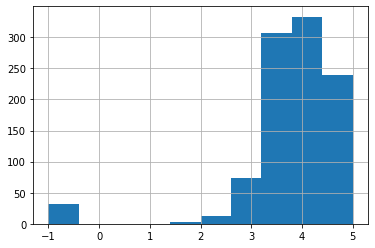

In [26]:
df.Rating.hist()
plt.show()

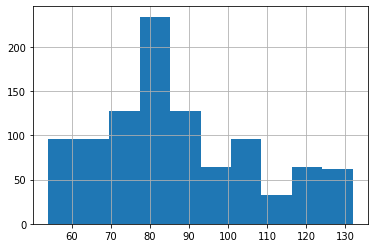

In [29]:
df['Salary(Avg)'].hist()
plt.show()

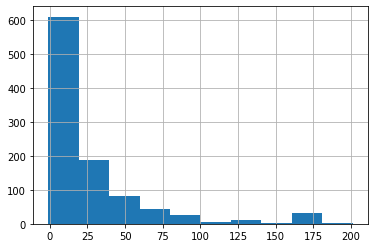

In [31]:
df['Company Age'].hist()
plt.show()

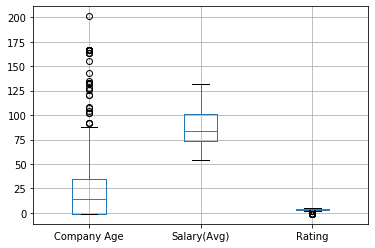

In [32]:
df.boxplot(column = ['Company Age','Salary(Avg)','Rating'])
plt.show()

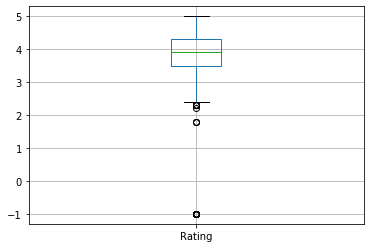

In [33]:
df.boxplot(column = 'Rating')
plt.show()

In [35]:
df[['Company Age','Salary(Avg)','Rating']].corr()

,Company Age,Salary(Avg),Rating
Company Age,1.000000,0.008930,0.017829
Salary(Avg),0.008930,1.000000,0.018979
Rating,0.017829,0.018979,1.000000


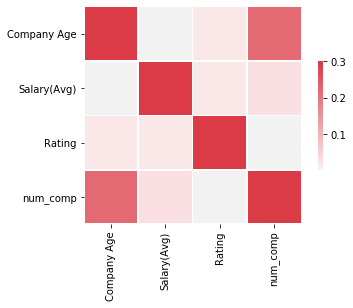

In [37]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Company Age','Salary(Avg)','Rating','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [38]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Company', 'min_sal', 'max_sal', 'Salary(Avg)', 'State', 'City',
       'Position at HQ', 'Company Age', 'JavaScript', 'Python', 'C_plus',
       'SQL', 'AWS', 'num_comp'],
      dtype='object')

In [39]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company', 'State', 'Python', 'C_plus',
       'SQL', 'AWS']]

graph for Location: total = 227


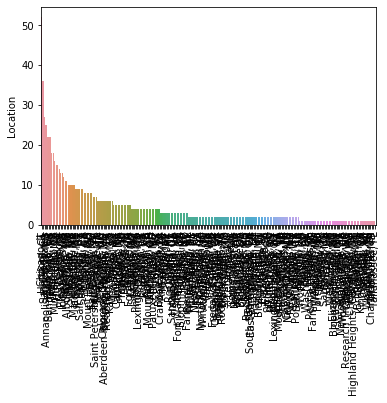

graph for Headquarters: total = 202


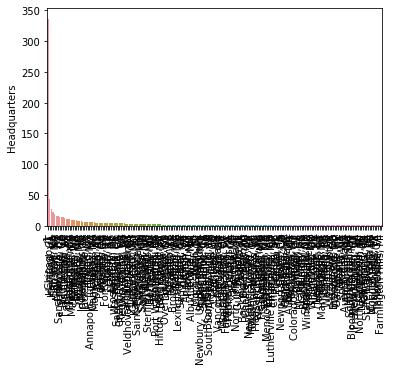

graph for Size: total = 9


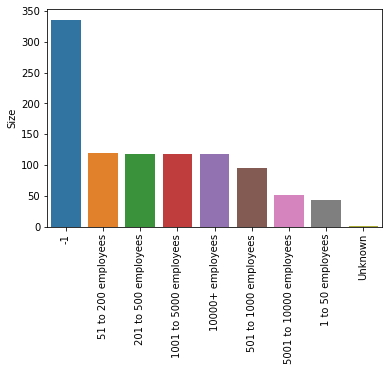

graph for Type of ownership: total = 12


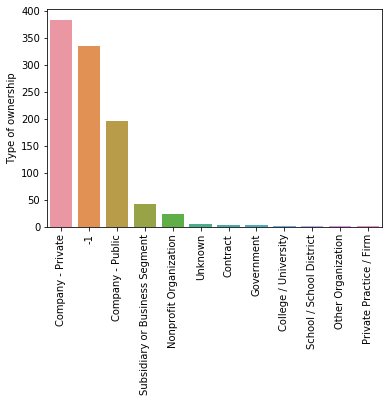

graph for Industry: total = 61


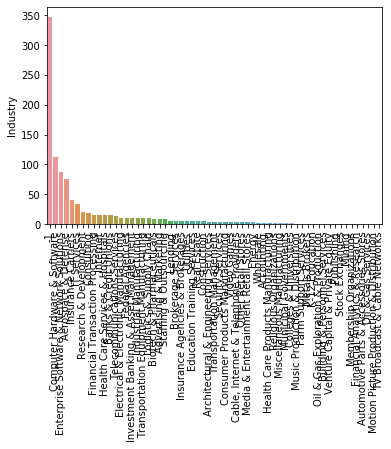

graph for Sector: total = 22


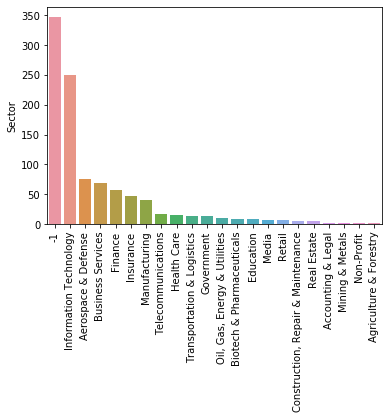

graph for Revenue: total = 14


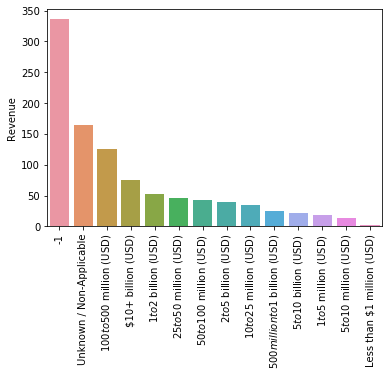

graph for Company: total = 335


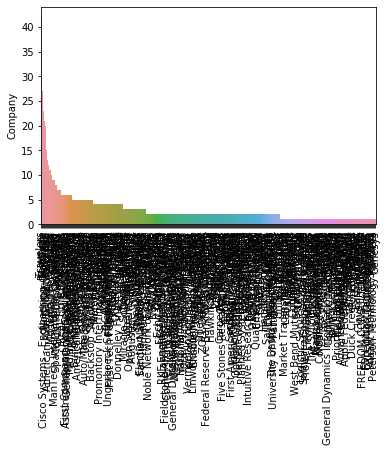

graph for State: total = 45


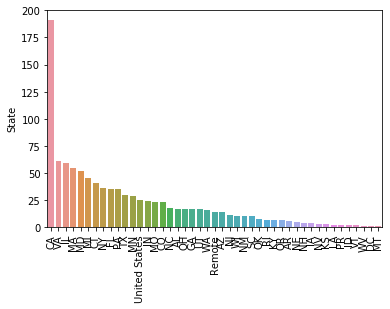

graph for Python: total = 2


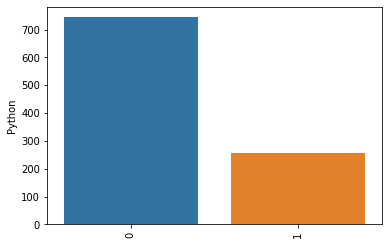

graph for C_plus: total = 2


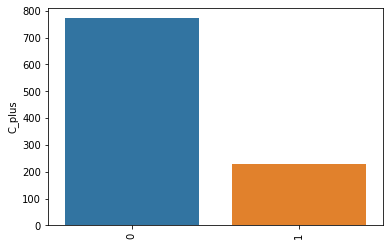

graph for SQL: total = 2


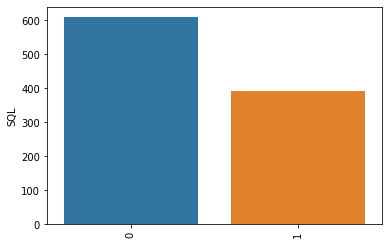

graph for AWS: total = 2


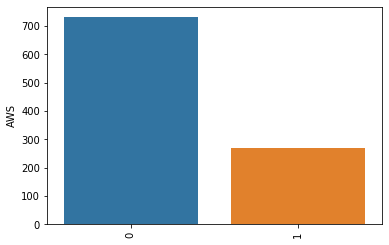

In [40]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


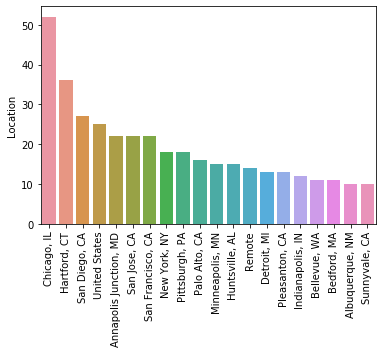

graph for Headquarters: total = 20


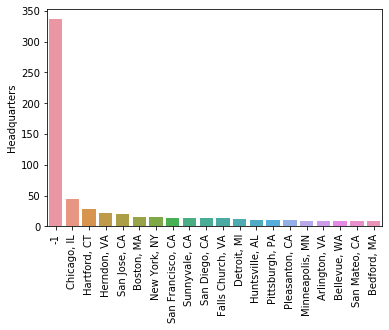

graph for Company: total = 20


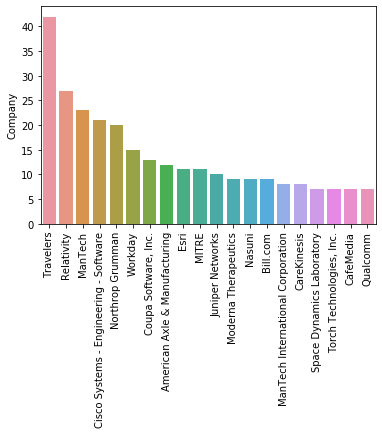

In [41]:
for i in df_cat[['Location','Headquarters','Company']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [42]:
pd.pivot_table(df , index = 'State', values = 'Salary(Avg)').sort_values('Salary(Avg)', ascending = False)

,Salary(Avg)
State,
PR,117.500000
VT,110.000000
NV,109.333333
KY,104.571429
NC,100.277778
LA,99.500000
OR,99.142857
PA,98.842857
NE,96.000000


In [43]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Company', 'min_sal', 'max_sal', 'Salary(Avg)', 'State', 'City',
       'Position at HQ', 'Company Age', 'JavaScript', 'Python', 'C_plus',
       'SQL', 'AWS', 'num_comp'],
      dtype='object')

In [54]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'Python',
                'C_plus', 'SQL', 'AWS', 'Type of ownership', 'Salary(Avg)']]

In [56]:
for i in df_pivots.columns:
    print(i)
    if i != 'Salary(Avg)':
        print(pd.pivot_table(df_pivots,index =i, values = 'Salary(Avg)').sort_values('Salary(Avg)', ascending = False))

Rating
        Salary(Avg)
Rating             
 2.6     106.545455
 2.2     105.000000
 4.8     104.150000
 3.1      96.653846
 4.7      94.196970
 2.7      94.187500
 3.3      92.578947
 2.5      92.000000
 4.5      91.365385
 5.0      90.966667
 4.2      90.883333
 3.0      89.976190
 3.9      89.597222
 4.0      89.532110
 3.8      88.592105
 3.4      87.770833
 3.5      87.204545
 2.3      86.833333
 3.2      86.821429
 4.3      86.522727
-1.0      85.812500
 4.1      85.562500
 4.6      84.136364
 4.9      83.670455
 4.4      83.451923
 3.7      82.097403
 2.4      81.000000
 1.8      80.666667
 2.8      78.312500
 2.9      78.041667
 3.6      77.664634
Industry
                                       Salary(Avg)
Industry                                          
Automotive Parts & Accessories Stores      132.000
Venture Capital & Private Equity           117.500
Accounting                                 102.500
Staffing & Outsourcing                     102.250
Wholesale         

In [57]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'Python', values = 'Salary(Avg)', aggfunc = 'count')

Python,0,1
Revenue,,
$1 to $2 billion (USD),38,14
$1 to $5 million (USD),17,2
$10 to $25 million (USD),27,7
$10+ billion (USD),42,34
$100 to $500 million (USD),90,35
$2 to $5 billion (USD),30,10
$25 to $50 million (USD),35,11
$5 to $10 billion (USD),21,1
$5 to $10 million (USD),9,5


In [58]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'C_plus', values = 'Salary(Avg)', aggfunc = 'count')

C_plus,0,1
Revenue,,
$1 to $2 billion (USD),42.0,10.0
$1 to $5 million (USD),19.0,NaN
$10 to $25 million (USD),30.0,4.0
$10+ billion (USD),59.0,17.0
$100 to $500 million (USD),88.0,37.0
$2 to $5 billion (USD),30.0,10.0
$25 to $50 million (USD),39.0,7.0
$5 to $10 billion (USD),15.0,7.0
$5 to $10 million (USD),12.0,2.0
